In [159]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h3>Part A: histogram</h3>

In [160]:
from sklearn.datasets import fetch_20newsgroups


c1_train = fetch_20newsgroups(subset='train', categories=['comp.graphics'], shuffle=True, random_state=42)
c2_train = fetch_20newsgroups(subset='train', categories=['comp.os.ms-windows.misc'], shuffle=True, random_state=42)
c3_train = fetch_20newsgroups(subset='train', categories=['comp.sys.ibm.pc.hardware'], shuffle=True, random_state=42) 
c4_train = fetch_20newsgroups(subset='train', categories=['comp.sys.mac.hardware'], shuffle=True, random_state=42)

r1_train = fetch_20newsgroups(subset='train', categories=['rec.autos'], shuffle=True, random_state=42)
r2_train = fetch_20newsgroups(subset='train', categories=['rec.motorcycles'], shuffle=True, random_state=42)
r3_train = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball'], shuffle=True, random_state=42)
r4_train = fetch_20newsgroups(subset='train', categories=['rec.sport.hockey'], shuffle=True, random_state=42)





(584, 591, 590, 578, 594, 598, 597, 600)


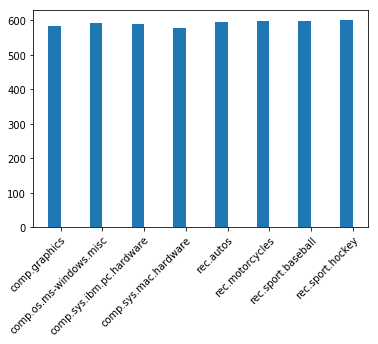

In [161]:
data_lens = []
data_lens = (len(c1_train.data),
             len(c2_train.data),
             len(c3_train.data),
             len(c4_train.data),
             len(r1_train.data),
             len(r2_train.data),
             len(r3_train.data),
             len(r4_train.data)
            )
print(data_lens)

names = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey']
ax = plt.subplot(111)
width = 0.3

#bins = map(lambda x: x-width/2, range(1, len(data_lens)+1))
index = np.arange(8)
ax.bar(index, data_lens, width=width)

#ax.set_xticks(map(lambda x: x, range(1, len(data_lens)+1)))
ax.set_xticks(index + width/2)
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")

plt.show()

<h3>Part B: TFxIDF</h3>

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

comp_categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

combined_categories = comp_categories + rec_categories
#comp_train = fetch_20newsgroups(subset='train', categories=comp_categories, shuffle=True, random_state=42)
#rec_train = fetch_20newsgroups(subset='train', categories=rec_categories, shuffle=True, random_state=42)

X_train = fetch_20newsgroups(subset='train', categories=combined_categories, shuffle=True, random_state=42)
X_test = fetch_20newsgroups(subset='test', categories=combined_categories, shuffle=True, random_state=42)


    

In [163]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import pos_tag
import nltk
import re
import string
stop_words = text.ENGLISH_STOP_WORDS

stemmer = SnowballStemmer("english")

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # what kind of stemming algorithm to use?

import re

class MyTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.token_pattern = re.compile(u'(?u)\\b\\w\\w+\\b')
        
    def __call__(self, doc):
        return [self.stemmer.stem(w) for w in self.token_pattern.findall(doc)]




vectorizer = CountVectorizer(stop_words='english', min_df=5)
X_train_vectors = vectorizer.fit_transform(X_train.data)
X_test_vectors = vectorizer.transform(X_test.data)




<h3>Part C: 10 most significant terms</h3>

In [164]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import math

"""
TFxICF = tf(t,c) * icf(t)
tf(t,c): term frequency of term t in class c
cf(t): class frequency (number of classes that contain t)

icf(t) = log(n_classes/cf(t)) + 1
cf(t): class frequency = number of classes where there is at least a document with term t
 
 we care about (zero-indexed) classes: 3,4,6,15
"""
n_classes = 20
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware', 
 'comp.sys.mac.hardware', 
 'comp.windows.x',
 'misc.forsale', 
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian', 
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']



all_docs_per_category=[]
#for each category, aggregate all of its documents into one large document
for cur_cat in categories:
    categories=[str(cur_cat)]
    docs_for_cat = fetch_20newsgroups(subset='train',categories=categories).data
    aggregated_docs = ""
    for doc in docs_for_cat:
        aggregated_docs= aggregated_docs + " "+doc
    all_docs_per_category.append(aggregated_docs)
    

#we will want to test both min_df=2 and min_df=5
"""
analyzer='word'means feature is made of words
stop_words='english' or use the stop_words from above
tokenizer=custom_tokenizer (use our custom tokenizer)
lowercase is true by default (to lower)
min_df=2
"""
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, 
                             tokenizer=MyTokenizer(), min_df=2, lowercase=True)
all_train_vecs = vectorizer.fit_transform(all_docs_per_category)




In [ ]:
#print(aggregate)
#print("Feature names", vect
print(len(vectorizer.get_feature_names()))
print(all_train_vecs.shape[1])

In [165]:
#print(all_train_vecs[1,:])
def calculate_tcicf(freq, max_tf_per_class, class_count_per_term):
    return (freq/float(max_tf_per_class))*(math.log10(n_classes/class_count_per_term) + 1)

def calculate_total_tcicf():
    #shape[0] = #classes
    #shape[1] = #features
    num_classes = all_train_vecs.shape[0]
    num_features = all_train_vecs.shape[1]
    
    #[i,:] gives us all columns in row i
    #[:,i] gives us all rows in col i 
    #np.amax gives us max value in that row
    max_tf_per_class = [np.amax(all_train_vecs[i,:]) for i in range(0, num_classes)]
    
    #need to iterate through whole matrix and check counts 
    class_count_per_term = np.zeros(num_features)
    
    #iterate through all of the classes
    for c in range(0, num_classes):
        #iterate through all of the features for that class (rows)
        for feature in range(0, num_features):
            if(all_train_vecs[c, feature] != 0):
                class_count_per_term[feature] += 1
                
    #tcicf matrix is terms * classes (?) big_num*20
    tf_icf = np.zeros((num_features, num_classes))


    for term in range(0, num_features):
        row = all_train_vecs[:,term].toarray()
        for c in range(0, num_classes):
            #we're indexing across first
            tf_icf[term][c] = calculate_tcicf(row[c,0], max_tf_per_class[c],class_count_per_term[term])

    return tf_icf
                
        
        

        

In [171]:
import operator 

tf_icf=calculate_total_tcicf()
cats_of_interest = [3,4,6,15]
terms = vectorizer.get_feature_names()

for cat in cats_of_interest:
    i = 0
    tf_dict = {}
    for term in terms:
        tf_dict[term] = tf_icf[i][cat]
        i += 1
        
# print top 10 significant term for this class
    #sort in increasing order and pick top 10 elements
    sorted_vals = sorted(tf_dict.items(), key=lambda elem: elem[1], reverse=True)
    top_to_bottom = sorted_vals[:10] 
    
    #need to extract 
    keys = []
    for pair in top_to_bottom: 
        keys.append(pair[0])

    print(keys)




['scsi', 'drive', 'edu', 'thi', 'use', 'line', 'com', 'subject', 'organ', 'ide']
['edu', 'thi', 'line', 'mac', 'subject', 'organ', 'use', 'appl', 'post', 'problem']
['edu', '00', 'line', 'subject', 'sale', 'organ', 'post', 'new', 'thi', 'com']
['thi', 'god', 'wa', 'christian', 'edu', 'hi', 'jesu', 'subject', 'peopl', 'line']


'\nfor category in [3,4,6,15]:\n    tficf={}\n    term_index=0;\n    for term in vectorizer.get_feature_names():\n        tficf[term]=tf_icf[term_index][category]\n        term_index+=1\n'

<h3>Part D: Dimensionality Reduction</h3>

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_tf = TfidfTransformer(norm='l2')

X_train_tfidf = tfidf_tf.fit_transform(X_train_vectors)
X_test_tfidf = tfidf_tf.transform(X_test_vectors)


In [145]:
#perform LSI w/ k=50
#NMF: min W,H: ||X-WH||^2

from sklearn.decomposition import NMF
nmf_model = NMF(n_components=50, init='random', random_state=0)
train_nmf = nmf_model.fit_transform(X_train_tfidf)
test_nmf = nmf_model.transform(X_test_tfidf)
H = nmf_model.components_

In [146]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

svd = TruncatedSVD(n_components=50)

def get_lsi(train_matrix, test_matrix):
    p = Pipeline(
        steps=[
            ('vector_counts', vectorizer),
            ('tfidf_transform', tfidf_tf),
            ('solve_svd', svd)
            
        ]
    )
    
    return p.fit_transform(train_matrix), p.transform(test_matrix)


In [147]:
#Qprint(len(X_train.data))
train_lsi, test_lsi = get_lsi(X_train.data, X_test.data)




<h1>Learning Algorithms</h1>

<h3>Part E: hard margin SVM</h3>

In [148]:
from sklearn.metrics import *


"""
Need to take our combined data and separate it into the two groups for 
binary classificaiton (computer tech or recreation)
"""
y_train = [int(x/4) for x in X_train.target]
y_test = [int(x/4) for x in X_test.target]


#Some performance metric evaluations
def evaluate(y_preds, y_test):

    f1 = f1_score(y_true=y_test, y_pred=y_preds, average='macro')
    acc = accuracy_score(y_test, y_preds)
    conf = confusion_matrix(y_test, y_preds)
    prec = precision_score(y_test, y_preds, average='macro')
    rec = recall_score(y_test, y_preds, average='macro')


    print("F1: ", f1)
    print("Accuracy: ", acc)
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("Confusion matrix: \n", conf)
    return (f1, acc, prec, rec, conf)

def roc_auc(probs, y):
    fpr, tpr, thresholds = roc_curve(y, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_str = 'ROC (AUC Gain = %0.2f)' % (roc_auc - 0.5)
    plt.plot(fpr, tpr, lw=1,label=roc_str)
    plt.plot([0,1],[0,1],label="RAN CLF")
    plt.title(roc_str)
    plt.show()
    
    
def prrc_auc(probs, y):
    pr, rc, thresholds = precision_recall_curve(y, probs[:, 1])
    roc_auc = auc(rc, pr)
    roc_str = 'Prec vs Recall (AUC Gain = %0.2f)' % (roc_auc - np.mean(y))
    plt.plot(rc,pr, lw=1,label=roc_str)
    plt.plot([0,1],[np.mean(y),np.mean(y)],label="RAN CLF")
    plt.axis([0,1,0,1])
    plt.title(roc_str)
    plt.show()
    
#print(X_test.target)
#print(y_test)
#print(y_train)

<h3> Evaluating the hard margin SVM (gamma=1000)</h3>

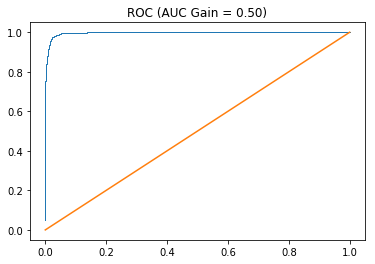

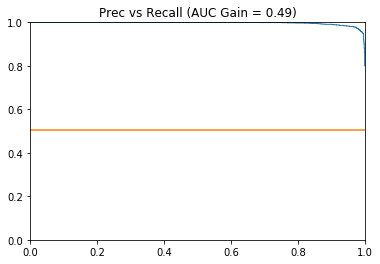

F1:  0.974276690064
Accuracy:  0.974285714286
Precision:  0.974523024066
Recall:  0.974195694243
Confusion matrix: 
 [[1505   55]
 [  26 1564]]


(0.97427669006380579,
 0.97428571428571431,
 0.97452302406635116,
 0.97419569424286401,
 array([[1505,   55],
        [  26, 1564]]))

In [149]:
from sklearn.svm import SVC
#Testing with LSI
clf_lsi = SVC(C=1000, probability=True)
clf_lsi.fit(train_lsi, y_train)

y_preds = clf_lsi.predict(test_lsi)
y_probs = clf_lsi.predict_proba(test_lsi)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)


<h3> Evaluating the Soft Margin SVM (gamma = 0.001)</h3>

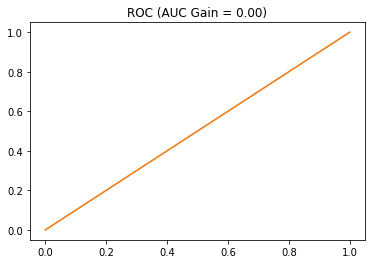

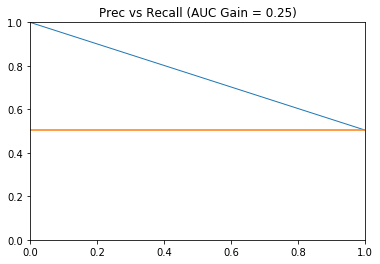

F1:  0.335443037975
Accuracy:  0.504761904762
Precision:  0.252380952381
Recall:  0.5
Confusion matrix: 
 [[   0 1560]
 [   0 1590]]


(0.33544303797468356,
 0.50476190476190474,
 0.25238095238095237,
 0.5,
 array([[   0, 1560],
        [   0, 1590]]))

In [150]:
#Testing with LSI
clf_lsi = SVC(C=0.001, probability=True)
clf_lsi.fit(train_lsi, y_train)

y_preds = clf_lsi.predict(test_lsi)
y_probs = clf_lsi.predict_proba(test_lsi)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)



<h3> Part F: 5-Fold Cross Validation </h3>

In [151]:
from sklearn.model_selection import KFold
from sklearn import cross_validation as cv

kf = KFold(n_splits=5, shuffle=True)
k_vals = [-3, -2, -1, 0, 1, 2, 3]
results = []
for kv in k_vals:
    gamma = 10**(kv)
    clf = SVC(C=gamma, probability=True)
    mean = np.mean(cv.cross_val_score(clf, train_lsi, y_train, cv=5))
    results.append(mean)
    print("Mean score for gamma=",gamma," is: ", mean)

print(results)


Mean score for gamma= 0.001  is:  0.504860572169
Mean score for gamma= 0.01  is:  0.504860572169
Mean score for gamma= 0.1  is:  0.504860572169
Mean score for gamma= 1  is:  0.95836767707
Mean score for gamma= 10  is:  0.971046195595
Mean score for gamma= 100  is:  0.975061548064
Mean score for gamma= 1000  is:  0.973161480051
[0.50486057216933178, 0.50486057216933178, 0.50486057216933178, 0.95836767707006665, 0.97104619559519989, 0.97506154806368461, 0.97316148005080017]


In [152]:
#Select the best classifier
best_index = np.argmax(results)
best_k = k_vals[best_index]
print("Best classifier is k=", best_k, " gamma=", 10**best_k)

clf_best = SVC(C=(10**best_k))
clf_best.fit(train_lsi, y_train)
y_preds = clf_best.predict(test_lsi)
metrics = evaluate(y_preds, y_test)


Best classifier is k= 2  gamma= 100
F1:  0.972373131381
Accuracy:  0.972380952381
Precision:  0.972541133544
Recall:  0.97230890179
Confusion matrix: 
 [[1505   55]
 [  32 1558]]


<h3> Part G: Naive Bayes </h3>

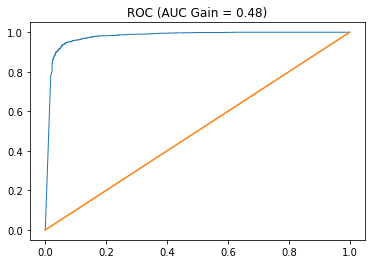

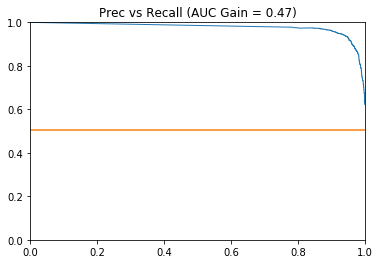

F1:  0.937430295353
Accuracy:  0.93746031746
Precision:  0.93781170428
Recall:  0.937336719884
Confusion matrix: 
 [[1442  118]
 [  79 1511]]


(0.93743029535260003,
 0.93746031746031744,
 0.93781170428004257,
 0.93733671988388978,
 array([[1442,  118],
        [  79, 1511]]))

In [153]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_nmf, y_train)

y_preds = clf.predict(test_nmf)
y_probs = clf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)



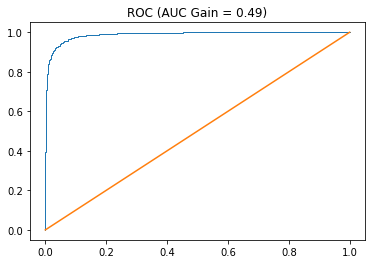

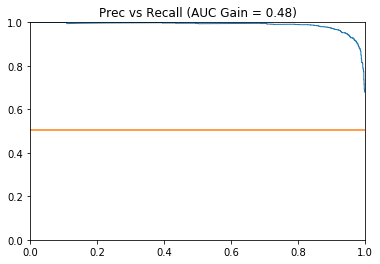

F1:  0.931514890619
Accuracy:  0.931746031746
Precision:  0.936201094356
Recall:  0.931277213353
Confusion matrix: 
 [[1376  184]
 [  31 1559]]


(0.93151489061949677,
 0.93174603174603177,
 0.93620109435610255,
 0.93127721335268498,
 array([[1376,  184],
        [  31, 1559]]))

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_nmf, y_train)

y_preds = clf.predict(test_nmf)
y_probs = clf.predict_proba(test_nmf)
#plot curves and evaluate
roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)




<h3> Part H: Logistic Regression </h3>

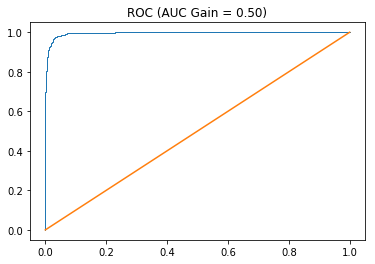

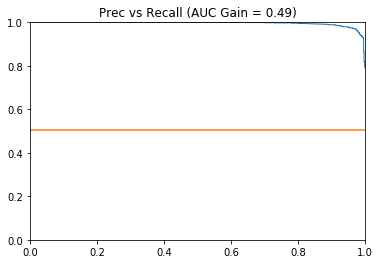

F1:  0.966968734031
Accuracy:  0.966984126984
Precision:  0.967353104508
Recall:  0.966866231253
Confusion matrix: 
 [[1489   71]
 [  33 1557]]


(0.96696873403135919,
 0.96698412698412695,
 0.96735310450816359,
 0.96686623125302373,
 array([[1489,   71],
        [  33, 1557]]))

In [155]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_lsi, y_train)
y_preds = clf.predict(test_lsi)
y_probs = clf.predict_proba(test_lsi)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_lsi, y_train)

roc_auc(y_probs, y_test)
prrc_auc(y_probs, y_test)
evaluate(y_preds, y_test)




<h3> Part I(1): Regularization in Logistic Regression </h3>

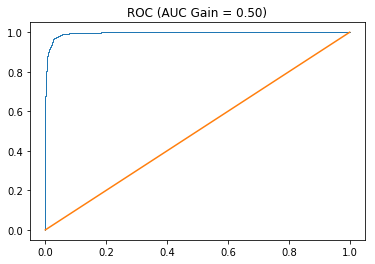

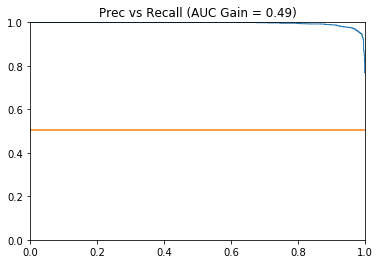

F1:  0.968559638238
Accuracy:  0.968571428571
Precision:  0.968832269723
Recall:  0.968474842767
Confusion matrix: 
 [[1495   65]
 [  34 1556]]


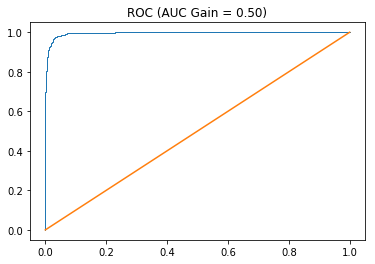

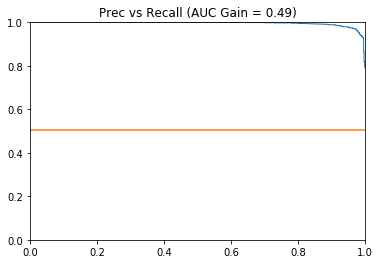

F1:  0.966968734031
Accuracy:  0.966984126984
Precision:  0.967353104508
Recall:  0.966866231253
Confusion matrix: 
 [[1489   71]
 [  33 1557]]


(0.96696873403135919,
 0.96698412698412695,
 0.96735310450816359,
 0.96686623125302373,
 array([[1489,   71],
        [  33, 1557]]))

In [156]:
"""
TODO: sweep coefficients 
"""
#Regularization L1
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(train_lsi, y_train)
y_preds_l1 = clf_l1.predict(test_lsi)
y_probs_l1 = clf_l1.predict_proba(test_lsi)


roc_auc(y_probs_l1, y_test)
prrc_auc(y_probs_l1, y_test)
evaluate(y_preds_l1, y_test)


#Regularization L2
clf_l2 = LogisticRegression(penalty='l2')
clf_l2.fit(train_lsi, y_train)
y_preds_l2 = clf_l2.predict(test_lsi)
y_probs_l2 = clf_l2.predict_proba(test_lsi)


roc_auc(y_probs_l2, y_test)
prrc_auc(y_probs_l2, y_test)
evaluate(y_preds_l2, y_test)



<h3> Part I(2): Multiclass Classification </h3>

In [157]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
#one vs one
svm = SVC(C=100)
clf_ovo = OneVsOneClassifier(svm)
clf_ovo.fit(train_lsi, y_train)
y_preds_ovo = clf_ovo.predict(test_lsi)

print("Evaluating one vs. one classifier...")
evaluate(y_preds_ovo, y_test)


print("\n \n")
#one vs rest
clf_ovr = OneVsRestClassifier(svm)
clf_ovr.fit(train_lsi, y_train)
y_preds_ovr = clf_ovr.predict(test_lsi)

print("Evaluating one vs. rest classifier...")
evaluate(y_preds_ovr, y_test)




Evaluating one vs. one classifier...
F1:  0.972373131381
Accuracy:  0.972380952381
Precision:  0.972541133544
Recall:  0.97230890179
Confusion matrix: 
 [[1505   55]
 [  32 1558]]

 

Evaluating one vs. rest classifier...
F1:  0.972373131381
Accuracy:  0.972380952381
Precision:  0.972541133544
Recall:  0.97230890179
Confusion matrix: 
 [[1505   55]
 [  32 1558]]


(0.97237313138080617,
 0.97238095238095235,
 0.97254113354369853,
 0.97230890179003393,
 array([[1505,   55],
        [  32, 1558]]))